In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Input,Embedding,GlobalAveragePooling1D,GlobalMaxPooling1D,Dense,LSTM,Bidirectional,TimeDistributed,Concatenate,Dropout

In [5]:
test_text = pd.read_csv("test.csv")
train_text = pd.read_csv("train.csv")

print(f"shape of train dataset >> {train_text.shape}")
print(f"shape of test dataset >> {test_text.shape}")

test_text.sample(5)

shape of train dataset >> (21332, 3)
shape of test dataset >> (7600, 3)


,Class Index,Title,Description
4138,3,Web-based kidney match raises ethics questions,A Colorado man who placed a quot;transplant w...
5402,4,Fusion reactor decision must wait,Six nations planning to build the world's bigg...
5843,3,Crude oil prices continue decline,Crude oil fell to the lowest price in almost t...
509,4,Vonage Calls on Linksys for VoIP,Linksys will provide broadband-to-phone adapte...
4089,3,Start of Ebbers Trial Delayed,NEW YORK -- A federal judge has delayed the tr...


In [6]:
train_text.sample(5)

,Class Index,Title,Description
14761,1,Situation in Darfur region still troublesome: ...,A senior United Nations official said here Mon...
4107,3,Stocks Sag as Oil Marches Higher,NEW YORK (Reuters) - U.S. stocks tumbled on T...
8985,3,"Shell Settles with SEC, UK for \$151 Mln",LONDON (Reuters) - Royal Dutch/Shell Group ag...
20288,1,Israel and Russia agree to fight terrorism,JERUSALEM: Israel and Russias foreign minister...
502,1,Kerry leading Bush in key swing states (AFP),AFP - Although polls show the US presidential ...


In [ ]:
# Data Preprocessing

In [7]:
# checking for missing values
train_text.isnull().sum()

Class Index    0
Title          0
Description    0
dtype: int64

In [8]:
# checking for missing values
test_text.isnull().sum()

Class Index    0
Title          0
Description    0
dtype: int64

In [9]:
count_labels = train_text['Class Index'].value_counts()

In [10]:
count_labels

1    5563
4    5517
2    5291
3    4961
Name: Class Index, dtype: int64

In [11]:
count2_labels = test_text['Class Index'].value_counts()

In [12]:
count2_labels

3    1900
4    1900
2    1900
1    1900
Name: Class Index, dtype: int64

In [13]:
index_to_label ={
    1:'World',
    2:'Sports',
    3:'Business',
    4:'Sci/Tech'
}

def return_dataset(dataset):
    label = dataset["Class Index"]
    label = pd.get_dummies(label)
    data = dataset["Title"] + " " + dataset["Description"]
    print(f"shape of data >> {data.shape}")
    print(f"shape of label >> {label.shape}\n")
    return data,label

train_data2,train_label = return_dataset(train_text)
test_data2,test_label = return_dataset(test_text)

shape of data >> (21332,)
shape of label >> (21332, 4)

shape of data >> (7600,)
shape of label >> (7600, 4)



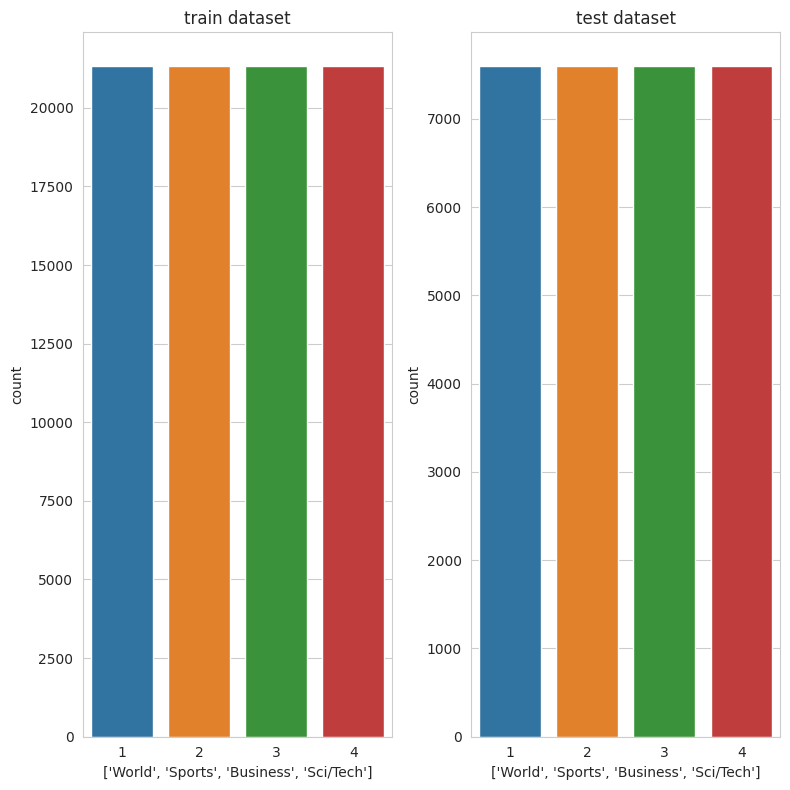

In [14]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(8,8))

axe1 = fig.add_subplot(1,2,1)
sns.countplot(data=train_label)
axe1.set_title("train dataset")
axe1.set_xlabel([index_to_label[i] for i in range(1,5)])

axe2 = fig.add_subplot(1,2,2)
sns.countplot(data=test_label)
axe2.set_title("test dataset")
axe2.set_xlabel([index_to_label[i] for i in range(1,5)])


plt.tight_layout()
plt.show()

In [ ]:
# Text Preprocessing

In [15]:
port_stem = PorterStemmer()

In [16]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    return stemmed_content

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
train_data2 = train_data2.apply(stemming)

In [19]:
train_data2

0        [wall, st, bear, claw, back, black, reuter, re...
1        [carlyl, look, toward, commerci, aerospac, reu...
2        [oil, economi, cloud, stock, outlook, reuter, ...
3        [iraq, halt, oil, export, main, southern, pipe...
4        [oil, price, soar, time, record, pose, new, me...
                               ...                        
21327    [hurrican, ivan, damag, part, barbado, st, geo...
21328    [digit, home, cometh, say, intel, lt, strong, ...
21329    [intel, goe, public, wimax, plan, lt, strong, ...
21330    [intel, admit, itanium, pain, plot, server, fu...
21331    [met, offic, unveil, supercomput, met, offic, ...
Length: 21332, dtype: object

In [20]:
test_data2 = test_data2.apply(stemming)

In [21]:
from keras.preprocessing.text import Tokenizer

tok = Tokenizer()
tok.fit_on_texts(train_data2)
print(f"numbers of words used >> {len(tok.word_index)}")

word_size = 999
vocab_size = word_size+1 #1000

tok = Tokenizer(num_words=word_size)
tok.fit_on_texts(train_data2)

word_index = tok.word_index
index_word = tok.index_word

train_data2 = tok.texts_to_sequences(train_data2)
test_data2 = tok.texts_to_sequences(test_data2)

print("First two samples")
print(train_data2[0])
print(train_data2[1])

numbers of words used >> 20521
First two samples
[423, 708, 55, 890, 1, 1, 857, 423, 346, 417, 984]
[183, 614, 1, 1, 847, 582, 153, 61, 72, 509, 39, 187, 516, 175, 397, 194, 296, 54]


In [23]:
pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.2 MB/s eta 0:00:00


maximum >> 80
minimum >> 1
average >> 16.844740296268515
median >> 16.0



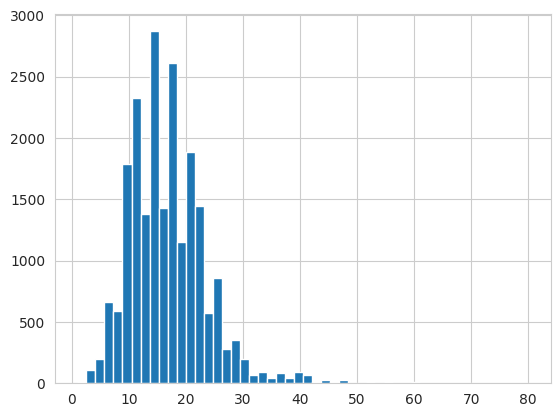

print first two samples
[423 708  55 890   1   1 857 423 346 417 984   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[183 614   1   1 847 582 153  61  72 509  39 187 516 175 397 194 296  54
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]

train data shape >> (21332, 50)
test data shape >> (7600, 50)


In [24]:
from keras_preprocessing.sequence import pad_sequences

print(f"maximum >> {np.max([len(s)for s in train_data2])}")
print(f"minimum >> {np.min([len(s)for s in train_data2])}")
print(f"average >> {np.mean([len(s)for s in train_data2])}")
print(f"median >> {np.median([len(s)for s in train_data2])}\n")

lens = [len(s) for s in train_data2]
plt.hist(lens,bins=50)
plt.show()

sequence_len = 50

train_data2 = pad_sequences(train_data2,maxlen=sequence_len,padding='post',truncating='post')
test_data2 = pad_sequences(test_data2,maxlen=sequence_len,padding='post',truncating='post')

print("print first two samples")
print(train_data2[0])
print(train_data2[1])

print("\ntrain data shape >>",train_data2.shape)
print("test data shape >>",test_data2.shape)

In [25]:
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau

reduceLR = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.5,min_lr=0.0001,verbose=1)

In [26]:
from keras.layers import GlobalMaxPooling1D

def create_lstm(word_vec_size=64,hidden_size=64):
    X = Input(shape=[sequence_len])
    H = Embedding(vocab_size,word_vec_size,input_length=sequence_len,mask_zero=True)(X)

    H = Bidirectional(LSTM(hidden_size,return_sequences=True))(H)
    all_hidden = Bidirectional(LSTM(int(hidden_size/2),return_sequences=True))(H)
    average = GlobalMaxPooling1D()(all_hidden)
    last_hidden = all_hidden[:,-1,:]

    H = Concatenate()([average,last_hidden])

    H = Dropout(0.2)(H)
    H = Dense(1024)(H)
    H = Dropout(0.2)(H)
    H = Dense(256)(H)
    H = Dropout(0.2)(H)
    H = Dense(32)(H)
    H = Dropout(0.1)(H)

    Y = Dense(4,activation='softmax')(H)

    model = keras.models.Model(X,Y)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    return model


lstm = create_lstm(256,256)
hist = lstm.fit(train_data2,train_label,batch_size=256,validation_split=0.2,epochs=10,verbose=1,callbacks=[reduceLR])
ev = lstm.evaluate(test_data2,test_label)

Epoch 1/10
67/67 [==============================] - 326s 4s/step - loss: 0.6192 - accuracy: 0.7594 - val_loss: 0.4436 - val_accuracy: 0.8498 - lr: 0.0010
Epoch 2/10
67/67 [==============================] - 262s 4s/step - loss: 0.3792 - accuracy: 0.8710 - val_loss: 0.4257 - val_accuracy: 0.8580 - lr: 0.0010
Epoch 3/10
67/67 [==============================] - 266s 4s/step - loss: 0.3354 - accuracy: 0.8858 - val_loss: 0.4505 - val_accuracy: 0.8552 - lr: 0.0010
Epoch 4/10
67/67 [==============================] - 262s 4s/step - loss: 0.3062 - accuracy: 0.8945 - val_loss: 0.4432 - val_accuracy: 0.8568 - lr: 0.0010
Epoch 5/10
67/67 [==============================] - ETA: 0s - loss: 0.2680 - accuracy: 0.9057
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
67/67 [==============================] - 259s 4s/step - loss: 0.2680 - accuracy: 0.9057 - val_loss: 0.5000 - val_accuracy: 0.8444 - lr: 0.0010
Epoch 6/10
67/67 [==============================] - 262s 4s/step - loss

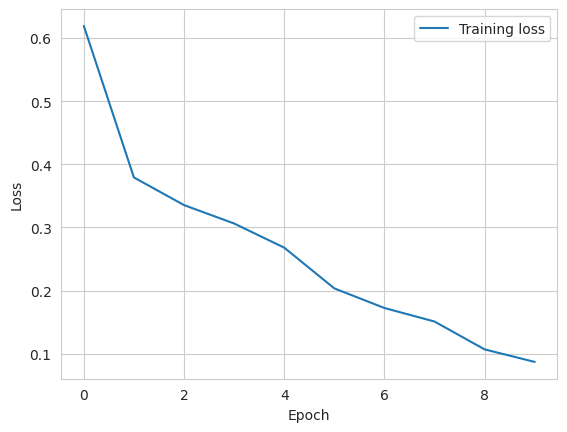

In [27]:
import matplotlib.pyplot as plt

loss = hist.history['loss']

plt.plot(loss, label='Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
def classify_paragraph(paragraph, tokenizer, model):
    paragraph_sequence = tokenizer.texts_to_sequences([paragraph])

    paragraph_padded = pad_sequences(paragraph_sequence, maxlen=sequence_len, padding='post', truncating='post')

    predictions = model.predict(paragraph_padded)

    predicted_class_index = np.argmax(predictions)
    predicted_class = index_to_label[predicted_class_index + 1]

    return predicted_class

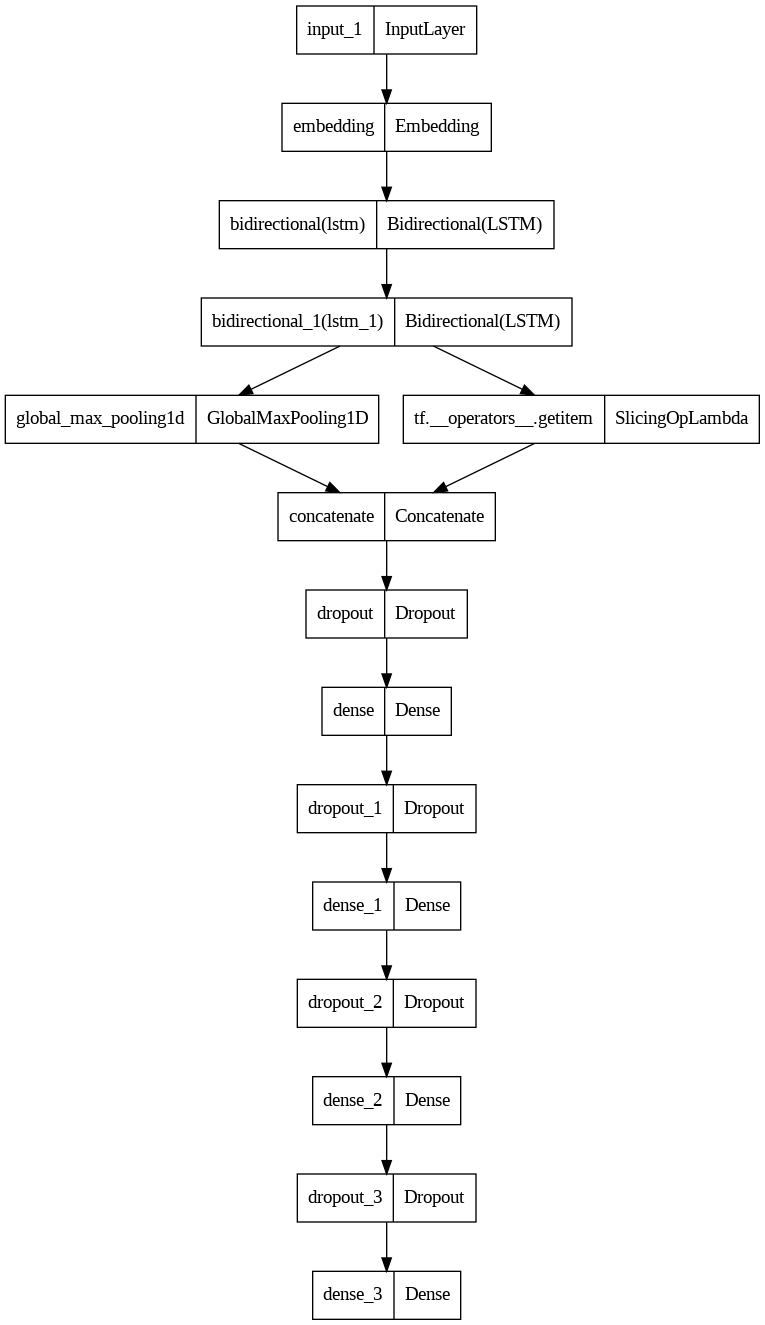

In [29]:
plot_model(lstm)

In [30]:
paragraph = "I am excited to watch the football match tonight. The teams have been performing exceptionally well this season."

predicted_class = classify_paragraph(paragraph, tok, lstm)
print("Predicted Class:", predicted_class)

1/1 [==============================] - 12s 12s/step
Predicted Class: Sports


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the training data
train_predictions = lstm.predict(train_data2)
train_predicted_labels = np.argmax(train_predictions, axis=1) + 1

# Convert one-hot encoded labels back to single label
train_true_labels = np.argmax(train_label.values, axis=1) + 1

# Calculate evaluation metrics
train_classification_report = classification_report(train_true_labels, train_predicted_labels)
train_confusion_matrix = confusion_matrix(train_true_labels, train_predicted_labels)

print("Evaluation Metrics for Training Data:")
print("Classification Report:")
print(train_classification_report)
print("Confusion Matrix:")
print(train_confusion_matrix)

test_predictions = lstm.predict(test_data2)
test_predicted_labels = np.argmax(test_predictions, axis=1) + 1

test_true_labels = np.argmax(test_label.values, axis=1) + 1

test_classification_report = classification_report(test_true_labels, test_predicted_labels)
test_confusion_matrix = confusion_matrix(test_true_labels, test_predicted_labels)

print("\nEvaluation Metrics for Test Data:")
print("Classification Report:")
print(test_classification_report)
print("Confusion Matrix:")
print(test_confusion_matrix)

667/667 [==============================] - 149s 223ms/step
Evaluation Metrics for Training Data:
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.93      0.95      5563
           2       0.96      0.98      0.97      5291
           3       0.94      0.93      0.93      4961
           4       0.93      0.95      0.94      5517

    accuracy                           0.95     21332
   macro avg       0.95      0.95      0.95     21332
weighted avg       0.95      0.95      0.95     21332

Confusion Matrix:
[[5175  138  106  144]
 [  44 5185   28   34]
 [  87   33 4629  212]
 [  60   43  185 5229]]
238/238 [==============================] - 50s 208ms/step

Evaluation Metrics for Test Data:
Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.78      0.81      1900
           2       0.89      0.89      0.89      1900
           3       0.78      0.75      0.76      1900
 

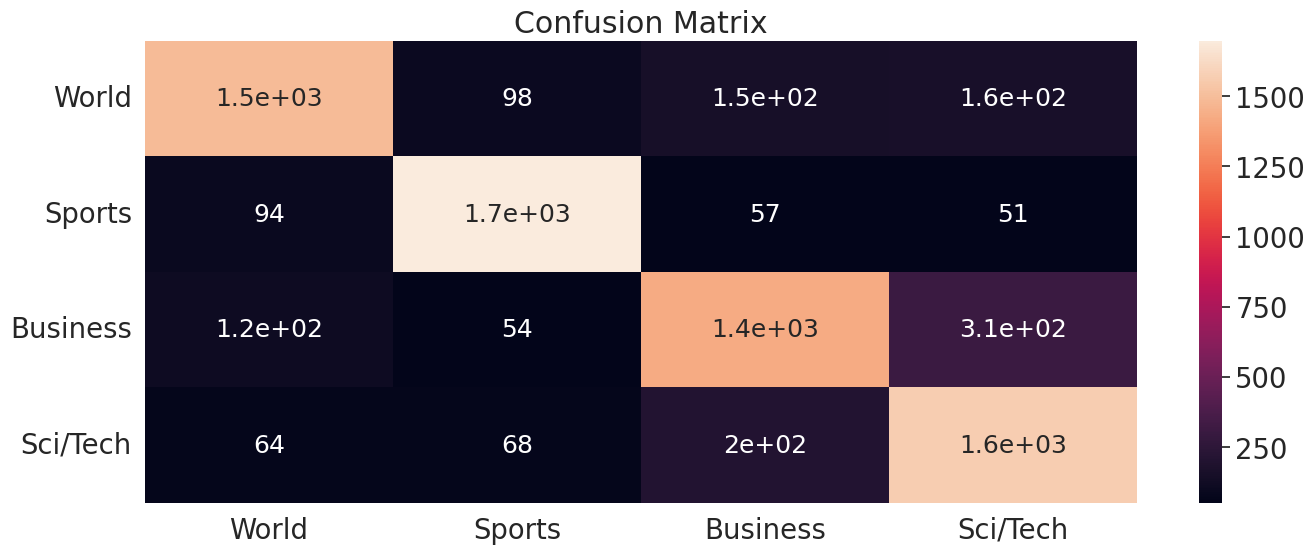

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

conf_matrix = confusion_matrix(test_true_labels, test_predicted_labels)
conf_matrix_norm = confusion_matrix(test_true_labels, test_predicted_labels,normalize='true')

# set labels for matrix axes from emotions
labels_list =['World','Sports','Business','Sci/Tech']
label_name = [label for label in labels_list]

# make a confusion matrix with labels using a DataFrame
confmatrix_df = pd.DataFrame(conf_matrix, index=label_name, columns=label_name)

# plot confusion matrices
plt.figure(figsize=(16,6))
sn.set(font_scale=1.8)

plt.title('Confusion Matrix')
sn.heatmap(confmatrix_df, annot=True, annot_kws={"size": 18})

plt.show()

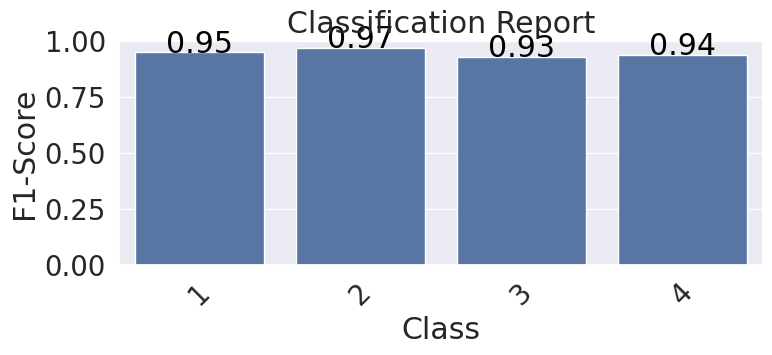

In [33]:
def plot_classification_report(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-5]:
        row = line.split()
        if len(row) >= 4:
            report_data.append(row[:4])

    labels = ['Class', 'Precision', 'Recall', 'F1-Score']
    data = []
    for row in report_data:
        data.append([row[0], float(row[1]), float(row[2]), float(row[3])])

    df = pd.DataFrame(data, columns=labels)
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.barplot(x='Class', y='F1-Score', data=df, ax=ax)
    ax.set_title('Classification Report')
    ax.set_xlabel('Class')
    ax.set_ylabel('F1-Score')
    ax.set_ylim(0, 1)
    ax.grid(True, axis='y')
    plt.xticks(rotation=45)

    for i, row in enumerate(data):
        ax.text(i, row[3], f'{row[3]:.2f}', color='black', ha="center")

    plt.tight_layout()
    plt.show()

plot_classification_report(train_classification_report)